In this notebook, we count the number of unique reactions across both enzymatic and synthetic organic chemistry datasets as well as the number of unique mappings across these datasets. Given that each reaction can map to more than one rule, we have counted both the number of unique reactions just by themselves as well the number of unique reaction-template pairs.

In [1]:
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['figure.dpi'] = 500 # Resolution of figures
plt.rcParams["figure.autolayout"] = True
plt.rcParams["legend.loc"] = 'best'
plt.rcParams['xtick.labelsize']=18
plt.rcParams['ytick.labelsize']=18

In [3]:
mapped_USPTO50K_CHO_df = pd.read_csv("../data/processed/mapped_USPTO50K_CHO.csv")
mapped_USPTO50K_N_df = pd.read_csv("../data/processed/mapped_USPTO50K_N.csv")
mapped_USPTO50K_onlyS_df = pd.read_csv("../data/processed/mapped_USPTO50K_onlyS.csv")

In [4]:
mapped_USPTO50K_CHO_df = mapped_USPTO50K_CHO_df[~mapped_USPTO50K_CHO_df.duplicated()]
print(f'Number of unique mapped reactions from USPTO50K with C, H, O only: {mapped_USPTO50K_CHO_df.shape[0]}')

mapped_USPTO50K_N_df = mapped_USPTO50K_N_df[~mapped_USPTO50K_N_df.duplicated()]
print(f'Number of unique mapped reactions from USPTO50K with N: {mapped_USPTO50K_N_df.shape[0]}')

mapped_USPTO50K_onlyS_df = mapped_USPTO50K_onlyS_df[~mapped_USPTO50K_onlyS_df.duplicated()]
print(f'Number of unique mapped reactions from USPTO50K with S: {mapped_USPTO50K_onlyS_df.shape[0]}')

Number of unique mapped reactions from USPTO50K with C, H, O only: 9102
Number of unique mapped reactions from USPTO50K with N: 21057
Number of unique mapped reactions from USPTO50K with S: 1189


In [8]:
mapped_KEGG_df = pd.read_csv("../data/processed/EnzymeMap_KEGG_imt_rule_mappings.csv")
mapped_MetaCyc_df = pd.read_csv("../data/processed/EnzymeMap_MetaCyc_imt_rule_mappings.csv")
mapped_BRENDA_df = pd.read_csv("../data/processed/EnzymeMap_all_BRENDA_imt_rule_mappings.csv")

In [10]:
# when counting the number of biological reactions that have been mapped, we only consider the reaction string
mapped_KEGG_df = mapped_KEGG_df[~mapped_KEGG_df.duplicated()]
print(f'Number of unique mapped reactions from KEGG: {mapped_KEGG_df.shape[0]}')

mapped_MetaCyc_df = mapped_MetaCyc_df[~mapped_MetaCyc_df.duplicated()]
print(f'Number of unique mapped reactions from MetaCyc: {mapped_MetaCyc_df.shape[0]}')

mapped_BRENDA_df = mapped_BRENDA_df[~mapped_BRENDA_df.duplicated()]
print(f'Number of unique mapped reactions from BRENDA: {mapped_BRENDA_df.shape[0]}')

Number of unique mapped reactions from KEGG: 14530
Number of unique mapped reactions from MetaCyc: 6842
Number of unique mapped reactions from BRENDA: 85871


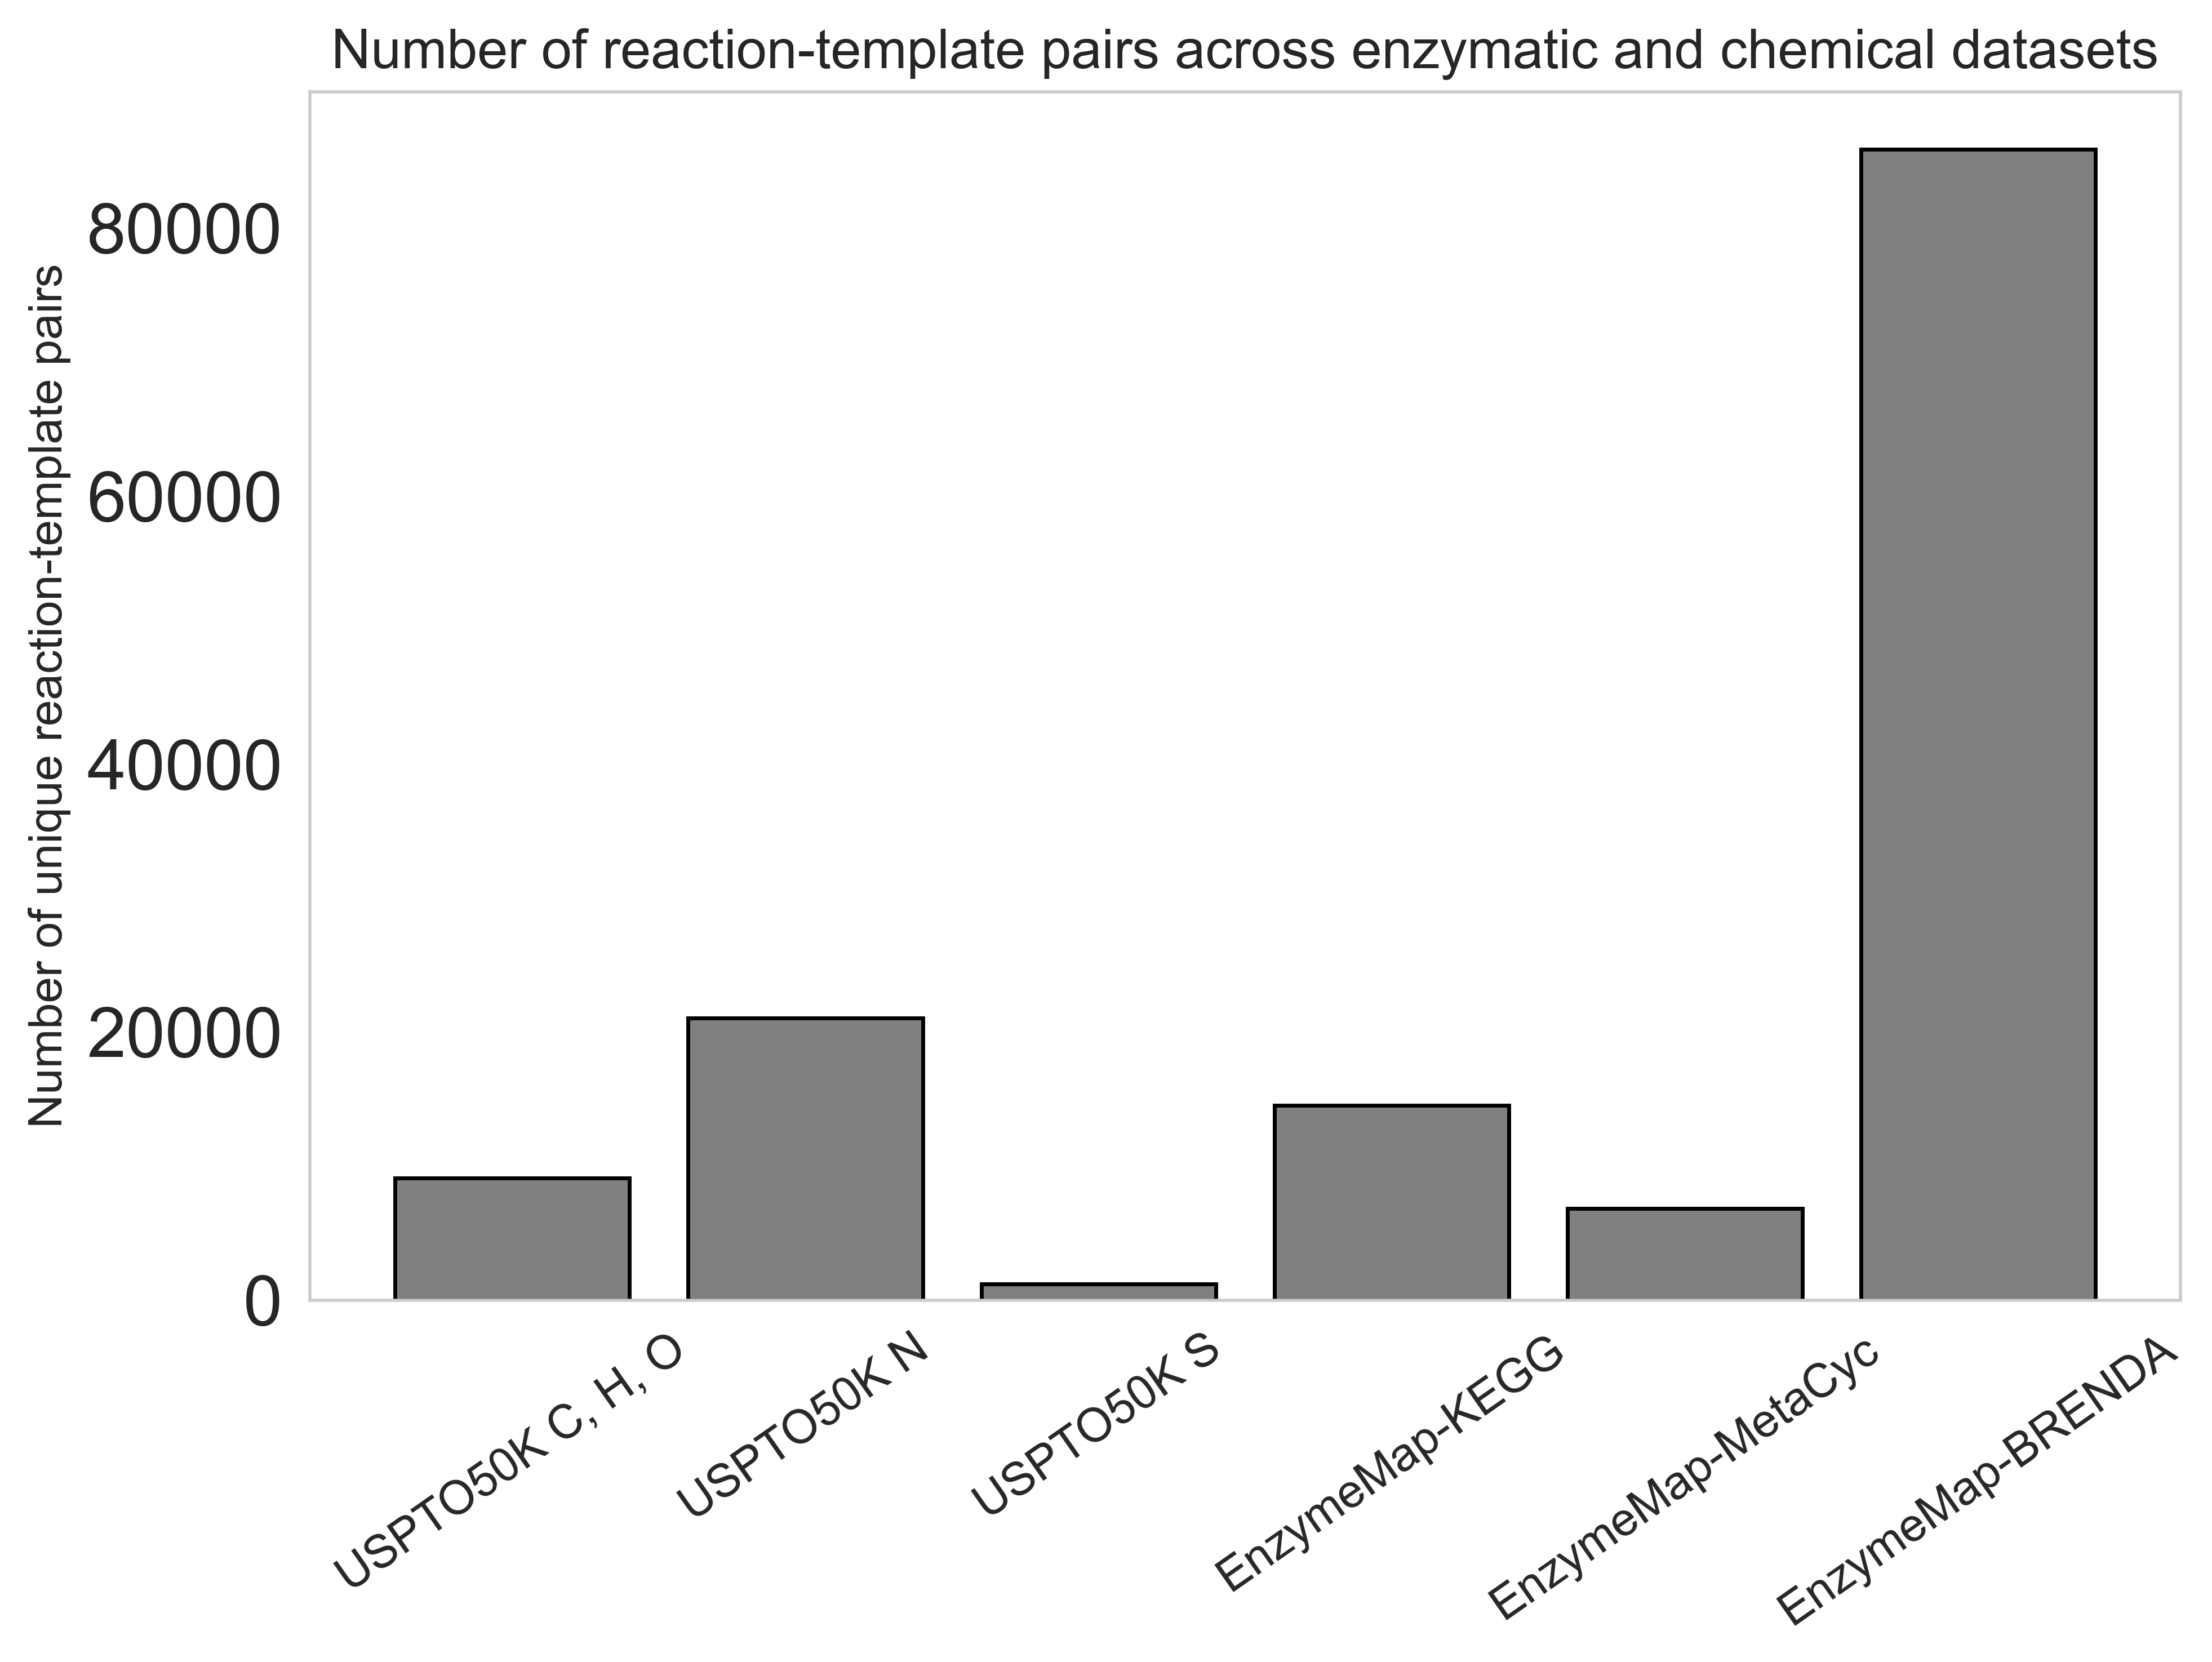

In [19]:
import matplotlib.pyplot as plt

labels = ['USPTO50K C, H, O', 
          'USPTO50K N', 
          'USPTO50K S',
          'EnzymeMap-KEGG',
          'EnzymeMap-MetaCyc',
          'EnzymeMap-BRENDA',]

values = [mapped_USPTO50K_CHO_df.shape[0], 
          mapped_USPTO50K_N_df.shape[0], 
          mapped_USPTO50K_onlyS_df.shape[0],
          mapped_KEGG_df.shape[0],
          mapped_MetaCyc_df.shape[0],
          mapped_BRENDA_df.shape[0]]

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color='grey', edgecolor = 'k')

# Labels and title
plt.xticks(rotation = 35, fontsize = 12)
plt.ylabel('Number of unique reaction-template pairs', fontsize = 12)
plt.title('Number of reaction-template pairs across enzymatic and chemical datasets', fontsize = 14)
plt.grid(visible = False)
plt.show()
